In [1]:
# Step 1: Importing Required Libraries
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

>Here in the above cell we are importing all the necessary packages that we require in our program.

In [2]:
# Step 2: Importing iris dataset
dataset=pd.read_csv('datasets/iris.csv')

### `.read_csv()`
> `read_csv()` is a function defined in the pandas library that facilitates us to read csv files.

Here we are using this function to read our datatset which is contained in `iris.csv` file

In [3]:
# Before applying Standard Scaler
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### `.head()`
> `head()` function is defined in the pandas library.<p>
The syntax for `.head` is `.head(n)`

This function takes integer value as input. By default the value of `n=5`<p>
This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

In [4]:
# Getting unique values in the target column (here: species) in the dataset 
dataset['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
# Step 3: Applying Label Encoder to convert categorical values in species column 'species' in Iris Dataset into integer values
label_encoder=LabelEncoder()
dataset['species']=label_encoder.fit_transform(dataset['species'])

In [6]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
data_points = dataset.iloc[:, 0:4]
labels = dataset.iloc[:, 4]

#### `.iloc[ ]`  function
It is defined in pandas library.
This .iloc function helps us to index the dataframe or dataset using index postions.
The syntax of .iloc functiond id `.iloc(rows,columns)`
Here we are have sepcified `.iloc[:,1:5]` this means that... we are selecting all the rows present in out dataset(iris.csv here) and out of all the colums that are present in out dataset we are only selecting 1st column upto 4th. As we can see here we are specifying columns [1:5]... so why the column with index is not taken because python doesnot include the last specified index. 

In [8]:
data_points

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
labels

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [10]:
# Step 4: Split the dataset into features and target variable
x_train,x_test,y_train,y_test = train_test_split(data_points,labels,test_size=0.2, random_state=42)

In [11]:
y_train

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: species, Length: 120, dtype: int64

### train_test_split() function 
> `train_test_split()` function is defined in Scikit-Learn library.<p>
> `train_test_split()` function helps in Spliting arrays or matrices into random train and test subsets.

The following is the syntax for `tarin_test_split`<p>
> **`sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None`**

The following is the decription of arguments that are taken by `train_test_split()` function:
- **arrays** = An input array/series : x,y
<p>
- **test_size** = The value should be between 0 to 1.0 which can be used to represent the proportion of data we want to include in testing data. For example- As we can see here we have mentioned test_size = 0.2, this means that we are considering 20% of our data under test_size.
</p>
<p>
- **train_size** = By default it is None as it adjusts according to test_size. Value is between 0 and 1.0. we have to only define this parameter if we are not defining test_size parameter.As we can see here that we have not defied trin_size, so here it will be automatically adjusted and it will be 80% of our data as here we have considered 20% of our data for train_size.
</p>
<p>
- **random_state** = Here we pass an integer, which will act as the seed for the random number generator during the split. Or, we can also pass an instance of the RandomState class, which will become the number generator. If we don’t pass anything, the RandomState instance used by np.random will be used instead. Also, if we pass any random number here then the `train_test_split()` function will generate exactly the same outputs every single time we run this function, given that we assigned the same number to Random_state. If you want your results to be stochastic(different) each time, simply leave it as the default value “None”.
</p>
<p>
- **shuffle** = By default it is True , this is used to specify if we want to shuffle the data before splitting. If shuffle is False , then stratify must be None.
</p>
<p>
- **stratify** = By default it is None , stratify means array like.
</p>


In [12]:
# Step 5: Applying Standard Scaler
Standard_obj = StandardScaler()
Standard_obj.fit(x_train)
x_train_std = Standard_obj.transform(x_train)
x_test_std = Standard_obj.transform(x_test)

### StandardScaler() function
> `StadardScaler()` function is defined in *scikit-learn* library<p>
> This function Standardize features by removing the mean and scaling to unit variance.</p>

> Syntax for `StadardScaler()` is given by : <p>
>**`StandardScaler(*, copy=True, with_mean=True, with_std=True)`**

<p> Many machine learning algorithms work better when features are on a relatively similar scale and close to normally distributed. StandardScaler is one of the scikit-learn method to preprocess data for machine learning.</p>

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. 
StandardScaler results in a distribution with a standard deviation equal to 1. The variance is equal to 1 also, because *variance = standard deviation squared*. And 1 squared = 1.</p>

<p> StandardScaler makes the mean of the distribution 0. About 68% of the values will lie be between -1 and 1.
Deep learning algorithms often call for zero mean and unit variance. Regression-type algorithms also benefit from normally distributed data with small sample sizes.</p>

>**The standard score of a sample x is calculated as:**

> $$ z = {x - μ \over σ} $$

>Where $ μ $ is the mean of the training samples or zero if `with_mean=False`, and $s$ is the standard deviation of the training samples or one if `with_std=False`.

**`.fit()`** is one of the method provided by StandardScaler function.<p>
This method Computes the mean and std to be used for later scaling.
Syntax of `fit()` method is given by:</p>
>**`.fit(X, y=None, sample_weight=None)`**

The following is the decription of parameters that are taken by `.fit()` method:
- **x** = An input or data used to compute the mean and standard deviation used for later scaling along the features axis.
<p>
- **y** = Ignored
</p>
<p>
- **sample_weight** = Here we can secify the individual weights for each sample. By default its value is None
</p>

**`.transform()`** is another method which is provided by StandardScaler function.<p>
This method Perform standardization by centering and scaling by using thevalues computed by `.fit()` function.
Syntax of `transform()` method is given by:</p>
>**`.transform(X, copy=None)`**

The following is the decription of parameters that are taken by `.fit()` method:
- **x** = An input or data used to scale along the features axis.
<p>
- **copy** = Copy the input X or not.
</p>

Here as we can see that  we are also importing **`cross_val_score()`**<p>
`cross_val_score()` function is defined in scikit-learn that returns score for each test fold i.e. list of accuracy scores in each iteration.

> **Cross-Validation** is basically a resampling technique to make our model sure about its efficiency and accuracy on the unseen data. In short, Model Validation technique, up for other applications.

In [13]:
# Step 6: Initializing and training Support Vector Machine classifier
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train_std, y_train)

SVC(gamma=0.1, random_state=0)

In the above cell we are using **Support Vector Classification** to classify our given data.

Here, firstly we are training our Support Vector Machine Classifier on the training data and then we are testing the performance of trained model using test dataset.Here we are using the Support Vector Machine Classifier implementation that is provided by *Scikit-Learn* library via **`SVC()`** function.

>**A Support Vector Machine (SVM)** is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

> Syntax for `SVC()` is given by : <p>
>**`SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)`**

The following is the decription of arguments that we have specified here in `SVC()` function:
- **`C`** = Here we pass a float value. C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly. In other words we can Say that C is a Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty. The *Default Value* for this parameter is *1.0*.<p>
    
- **`kernel`** = kernel parameters selects the type of hyperplane used to separate the data. Using ‘linear’ will use a linear hyperplane (a line in the case of 2D data). ‘rbf’ and ‘poly’ uses a non linear hyper-plane. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape `(n_samples, n_samples)`.
    
- **`degree`** = Degree is a parameter used when kernel is set to ‘poly’. It’s basically the degree of the polynomial used to find the hyperplane to split the data. This parameter is ignored by all other kernels. The default value of `degree = 3`.
    
- **`gamma`** = The gamma parameter takes the values: `scale`. `auto` or any `float` value. Gamma is a parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set. Gama is Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’ kernels.<p>
   
    - if `gamma = 'scale'` is passed then it uses 1/(n_features*X.var()) as value of gamma.<p>
    
    - if `'auto'` then it uses 1/n_features.

The default value of `gamma ='scale'`

- **`random_state`** = This parameter takes int value, RandomState instance or None. It Controls the pseudo random number generation for shuffling the data for probability estimates. Ignored when probability is False. Pass an int for reproducible output across multiple function calls. `Default` value of this parameter is `None`
    

In [14]:
# Step 7: Evaluting trained SVM Classifier
print('Training data accuracy {:.2f}'.format(svm.score(x_train_std, y_train)*100))
print('Testing data accuracy {:.2f}'.format(svm.score(x_test_std, y_test)*100))

Training data accuracy 96.67
Testing data accuracy 100.00


In [15]:
y_pred = svm.predict(x_test_std)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

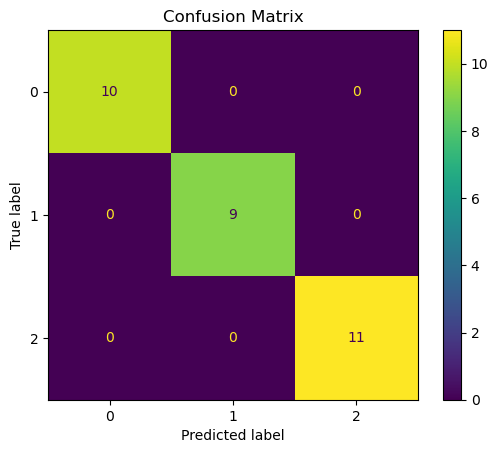

In [16]:
# Step 7: (Cont.) Confusion Matrix Display
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

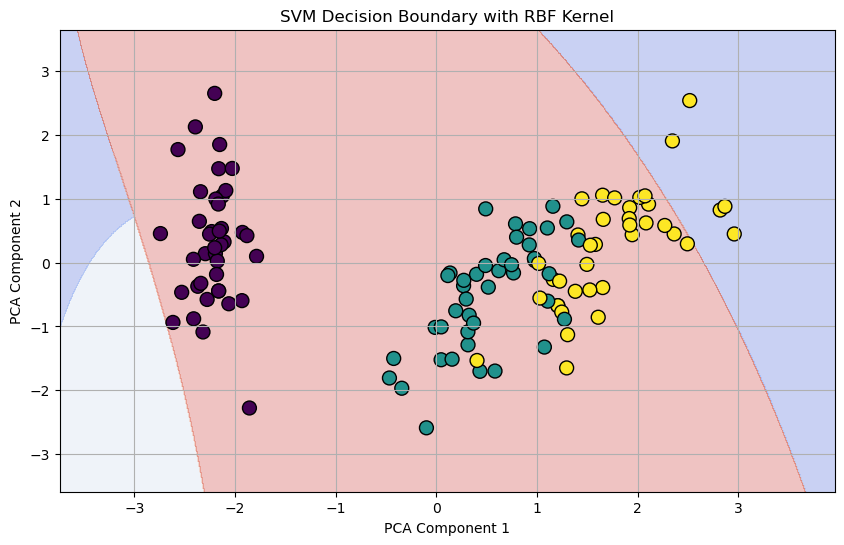

In [19]:
# Step 7: (Cont.) Visualizing SVM Classifier
# Reduce dataset dimensions to 2D for visualization using PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_std)

# Create a mesh grid for the decision boundary
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the mesh grid
Z = svm.predict(Standard_obj.inverse_transform(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])))
Z = Z.reshape(xx.shape)

# Plot decision boundary and training points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, edgecolors='k', marker='o', s=100)
plt.title('SVM Decision Boundary with RBF Kernel')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid()
plt.show()